In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

C:\Users\user\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\user\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv("CO2_emissions_Canada.csv")

In [3]:
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## EXPLORATORY DATA ANALYSIS

In [4]:
data.shape

(7385, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [8]:
data.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [9]:
#check for null values
data.isnull().values.any()

False

In [10]:
#drop duplicates
data1 = data.drop_duplicates(keep='first')

In [11]:
data1.shape

(6282, 12)

In [12]:
#summary statistics for numerical columns
data1.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000
mean,3.161812,5.618911,12.610220,9.070583,11.017876,27.411016,251.157752
std,1.365201,1.846250,3.553066,2.278884,2.946876,7.245318,59.290426
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,32.000000,289.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [13]:
#summary statistics for categorical columns
data1.describe(include='object').T

,count,unique,top,freq
Make,6282,42,FORD,577
Model,6282,2053,F-150 FFV,32
Vehicle Class,6282,16,SUV - SMALL,1006
Transmission,6282,27,AS6,1139
Fuel Type,6282,5,X,3039


<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Density'>

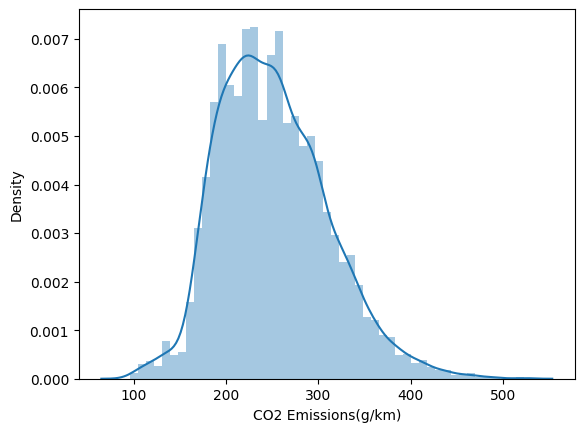

In [14]:
#distribution of target column
sns.distplot(data1['CO2 Emissions(g/km)'])

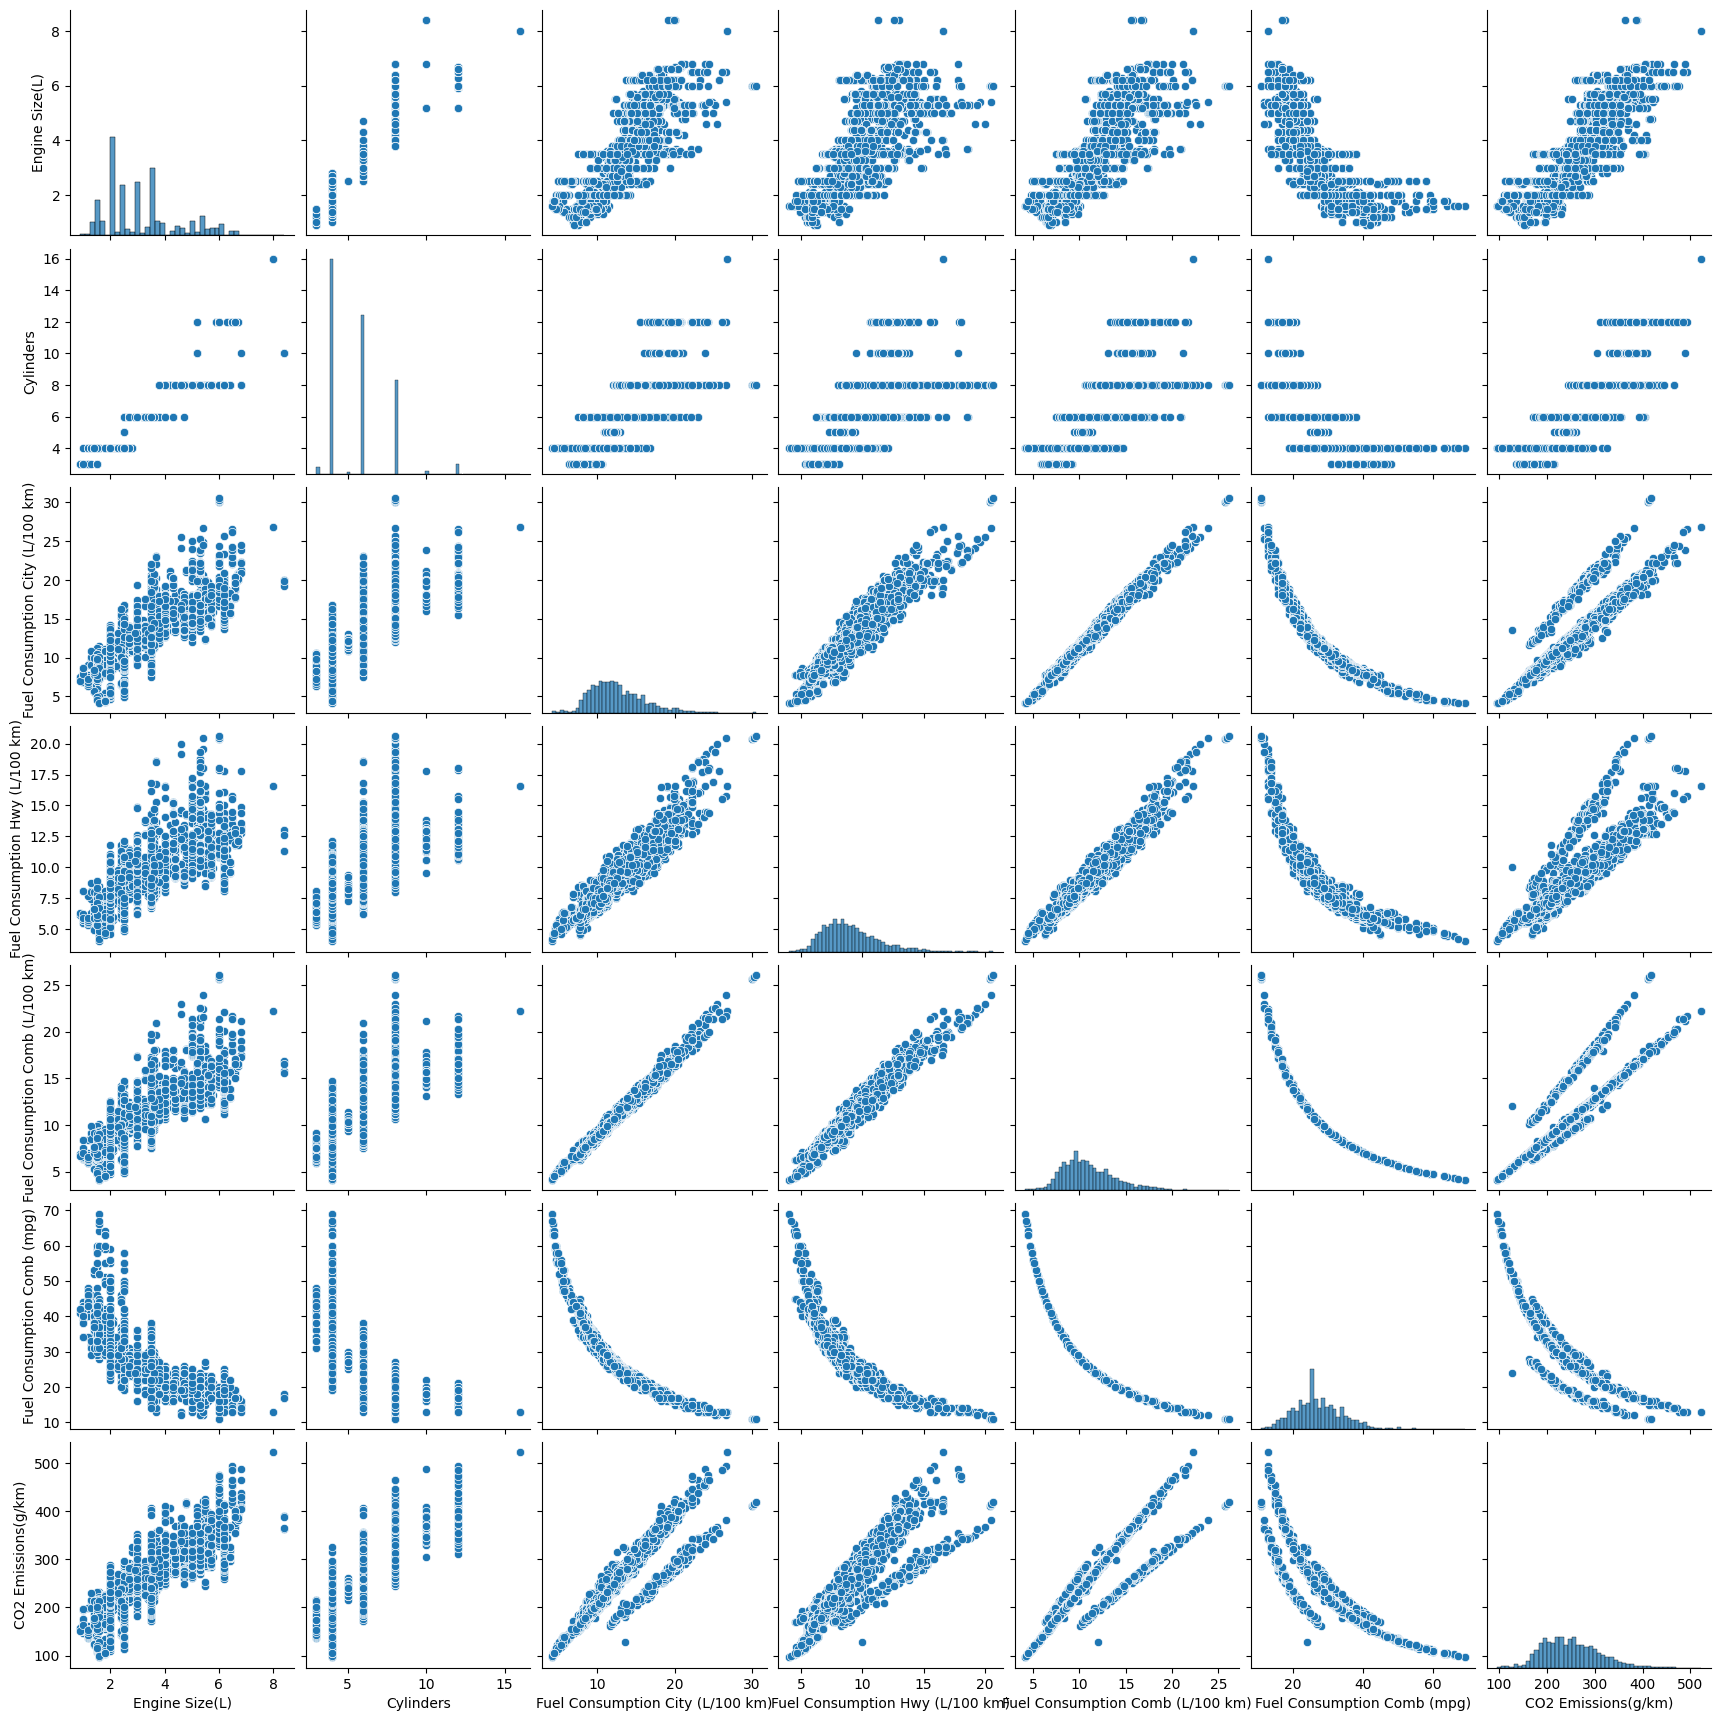

In [15]:
#pair dependency plot
sns.pairplot(data1)

-as engine size increases, so does the fuel consumption and number of cylinders

-carbon emissions have a positive relationship with all features except fuel consumption comb


In [16]:
#separate categorical from numerical features
from pandas.api.types import is_string_dtype,is_numeric_dtype
num_cols = []
cat_cols = []
for column in data1:
    if is_numeric_dtype(data1[column]):
        num_cols.append(column)
    else:
        cat_cols.append(column)

print("The numerical columns are : ",num_cols)
print("                            ")
print("The categorical columns are : ",cat_cols)

The numerical columns are :  ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']
                            
The categorical columns are :  ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']


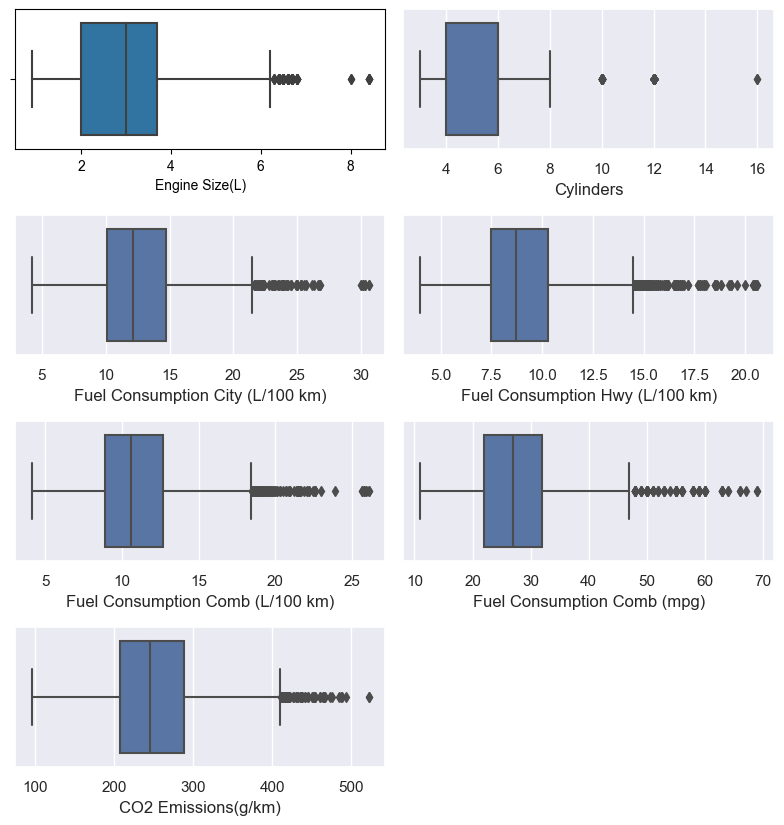

In [17]:
#boxplot showing the statistics for the numerical features
plt.figure(figsize=(8,10))
for i,j in enumerate(num_cols):
    plt.subplot(5,2,i+1)
    plt.subplots_adjust(wspace=1.0)
    ax = sns.boxplot(data = data1,x=j)
    sns.set(font_scale=1)
plt.tight_layout()

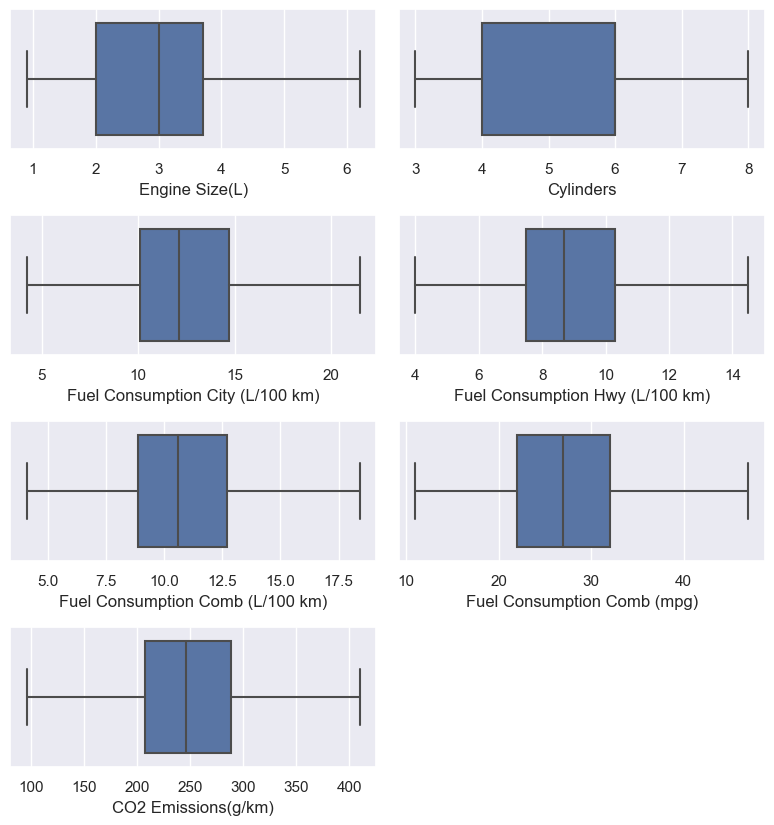

In [18]:
#boxplot showing the statistics for the numerical features
plt.figure(figsize=(8,10))
for i,j in enumerate(num_cols):
    plt.subplot(5,2,i+1)
    plt.subplots_adjust(wspace=1.0)
    ax = sns.boxplot(data = data1,x=j,showfliers=False)
    sns.set(font_scale=1)
plt.tight_layout()

<Axes: >

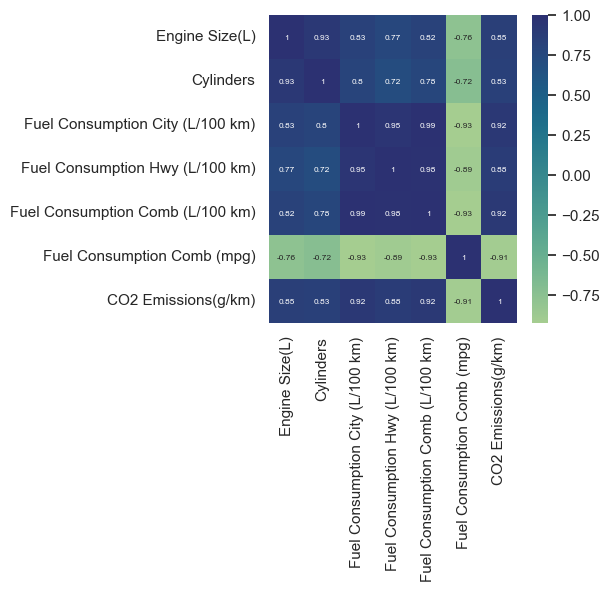

In [19]:
#check correlation
plt.figure(figsize=(4,4))
sns.heatmap(data1[num_cols].corr(),cmap='crest',annot=True,annot_kws={'size':6})

In [20]:
#variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
    vif = pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [21]:
calc_vif(data1[num_cols])

,variables,VIF
0,Engine Size(L),55.342008
1,Cylinders,84.408788
2,Fuel Consumption City (L/100 km),30259.901206
3,Fuel Consumption Hwy (L/100 km),10502.290341
4,Fuel Consumption Comb (L/100 km),75483.632928
5,Fuel Consumption Comb (mpg),7.807236
6,CO2 Emissions(g/km),140.173409


-numerical columns have very high correlation coeeficients apart from fuel consumption comb

In [22]:
##encoding categorical values
for i in cat_cols:
    print(i,':',data1[i].nunique())

Make : 42
Model : 2053
Vehicle Class : 16
Transmission : 27
Fuel Type : 5


-some of the categorical columns have significant cardinality

In [23]:
def cat_plot(col):
    plt.figure(figsize=(20,3))
    sortedData = data1.groupby([col])['CO2 Emissions(g/km)'].mean().sort_values(ascending=False).reset_index()
    sns.barplot(x= col,y='CO2 Emissions(g/km)',data= sortedData)
    plt.xticks(rotation=60)

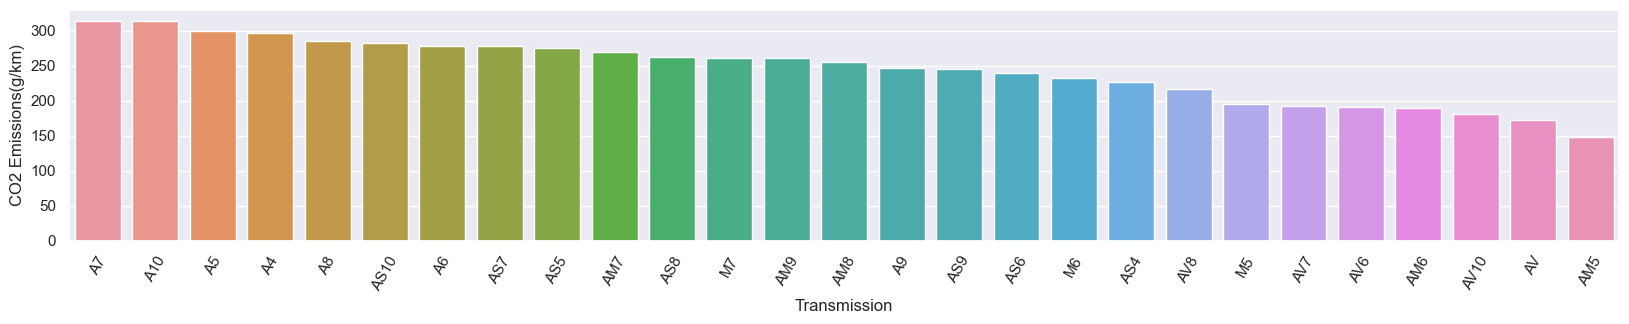

In [24]:
cat_plot("Transmission")

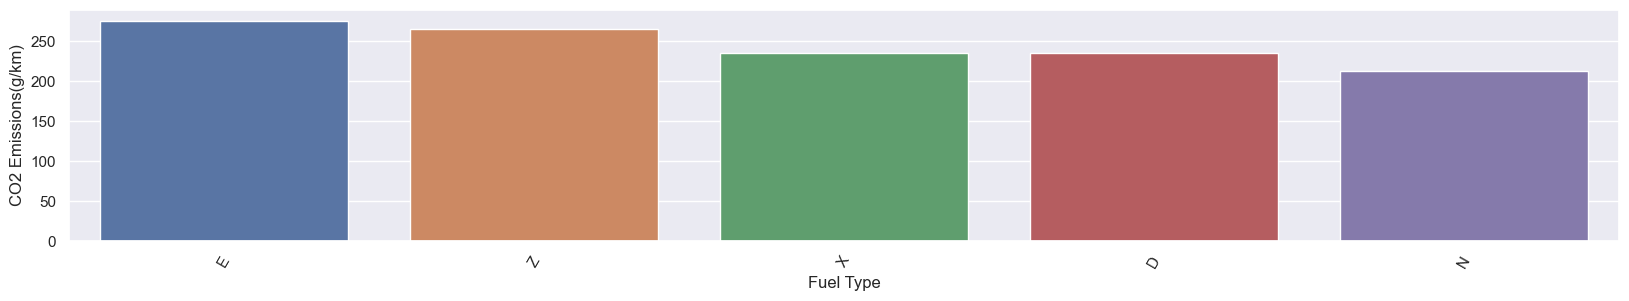

In [25]:
cat_plot("Fuel Type")

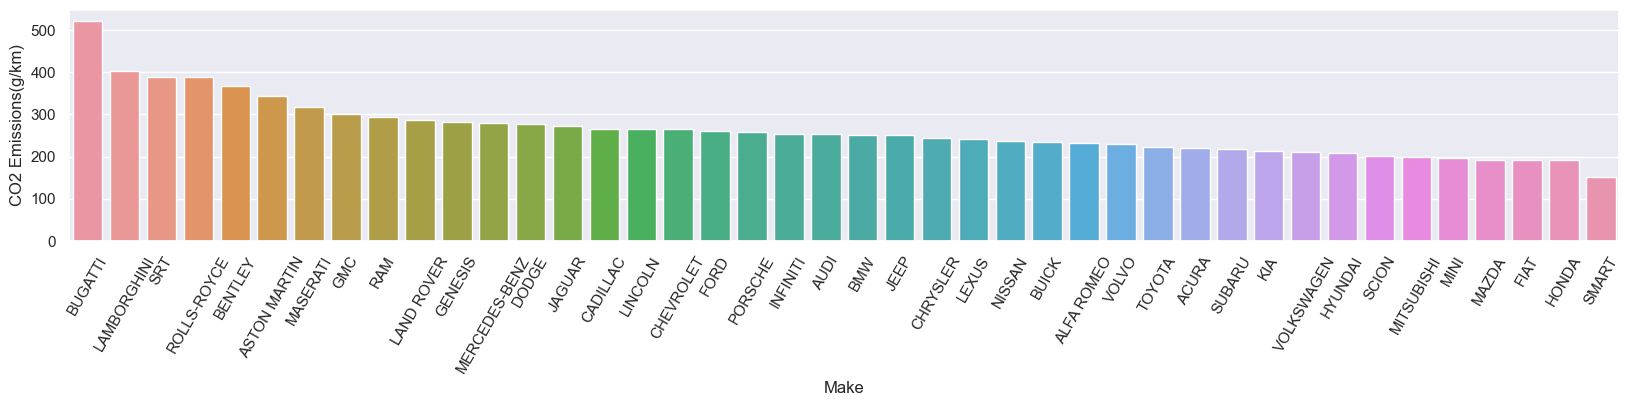

In [26]:
cat_plot("Make")

-Bugatti has the highest average carbon emissions while the least avergae emissions are from Smart cars

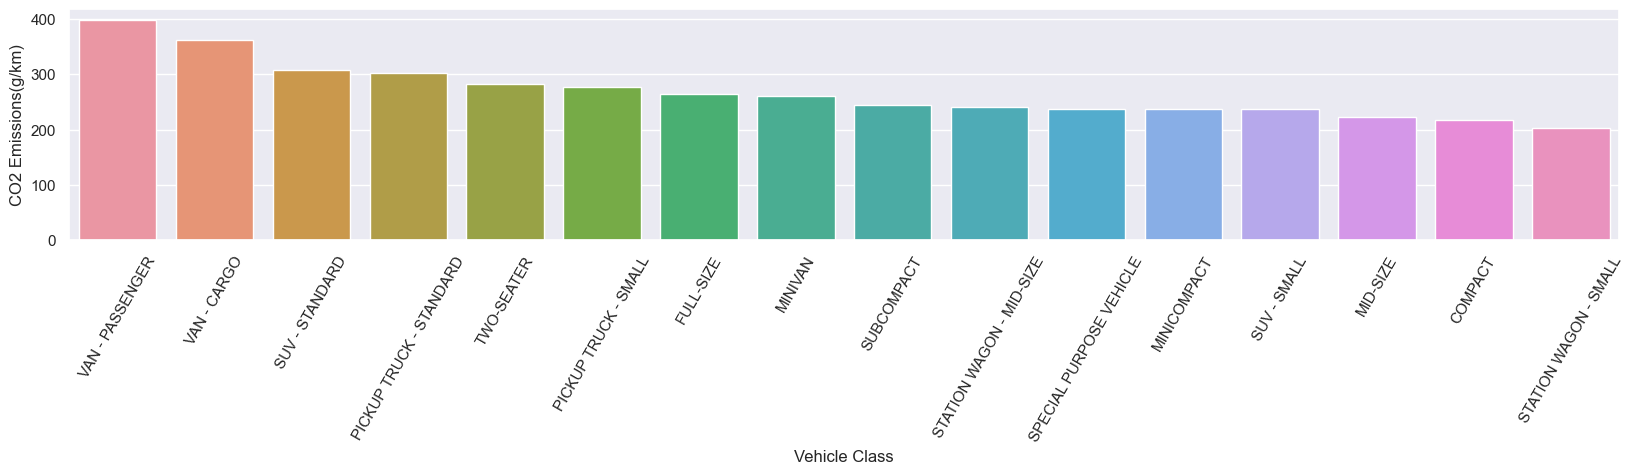

In [27]:
cat_plot("Vehicle Class")

In [28]:
#drop model column as it has significantly high cardinality

In [29]:
data1 = data1.drop('Model',axis=1)

In [30]:
data1.shape

(6282, 11)

In [31]:
cat_cols.remove('Model')

In [32]:
data1['Make'].unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

## FEATURE ENGINEERING

In [33]:
data2 = data1.copy()

In [34]:
print (cat_cols)

['Make', 'Vehicle Class', 'Transmission', 'Fuel Type']


In [35]:
data2.columns

Index(['Make', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission',
       'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [36]:
#ENCODE CATEGORICAL COLUMNS

#ONE HOT ENCODE VEHICLE CLASS
# we are going to one  hot encode the Fuel type
data2 = pd.get_dummies(data2, columns=['Fuel Type'], drop_first=False)

# Convert all the columns with prefix Fuel to 0/1 instead of False/True
fuel_cols = [col for col in data2.columns if col.startswith('Fuel')]
data2[fuel_cols] = data2[fuel_cols].astype(int)

#label encode vehicle class and transmission
le = LabelEncoder()
for col in [col for col in cat_cols if col not in ['Fuel Type']]:
    data2[col] = le.fit_transform(data2[col])

In [37]:
data2.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,0,0,2.0,4,14,9,6,8,33,196,0,0,0,0,1
1,0,0,2.4,4,25,11,7,9,29,221,0,0,0,0,1
2,0,0,1.5,4,22,6,5,5,48,136,0,0,0,0,1
3,0,11,3.5,6,15,12,9,11,25,255,0,0,0,0,1
4,0,11,3.5,6,15,12,8,10,27,244,0,0,0,0,1


In [38]:
data2.shape

(6282, 15)

In [39]:
data2.columns

Index(['Make', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission',
       'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)',
       'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)',
       'CO2 Emissions(g/km)', 'Fuel Type_D', 'Fuel Type_E', 'Fuel Type_N',
       'Fuel Type_X', 'Fuel Type_Z'],
      dtype='object')

# FEATURE SCALING AND DATA SPLIT

In [40]:
scale = StandardScaler()

In [41]:
target = ['CO2 Emissions(g/km)']

In [42]:
x = data2.drop(['CO2 Emissions(g/km)'],axis = 1)
y= data2[target]

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle=True,random_state=42,test_size=0.3)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(4397, 14) (1885, 14) (4397, 1) (1885, 1)


In [44]:
x_train_scaled=scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

## MODELS

In [45]:
#import required models
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error

In [46]:
#score calculator 
def scores_calc(y_test,y_pred):
    r2score = r2_score(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test,y_pred)
    return r2score,mse,rmse,mape
    

**1. LINEAR REGRESSION**

In [48]:
#initiate model
lg = LinearRegression(n_jobs=-1)

In [49]:
#fit model
lg.fit(x_train_scaled,y_train)

LinearRegression(n_jobs=-1)

In [50]:
#predict scores
lg_preds = lg.predict(x_test_scaled)
scores = scores_calc(y_test,lg_preds)
lg_scores = pd.DataFrame({'MODEL' : ["LINEAR_REGRESSION_BEFORE_TUNING"],
                          'R2_SCORE':scores[0],
                          'MSE':scores[1],
                          'RMSE':scores[2],
                          'MAPE':scores[3]})
lg_scores

,MODEL,R2_SCORE,MSE,RMSE,MAPE
0,LINEAR_REGRESSION_BEFORE_TUNING,0.988641,41.129288,6.413212,0.018299


In [51]:
#manual validations
scores = manual_scores_calc(y_test,lg_preds)
valid_scores = pd.DataFrame({'MODEL' : ["LINEAR_REGRESSION_MANUAL_VALIDATION"],
                          'R2_SCORE':scores[0],
                          'MSE':scores[1],
                          'RMSE':scores[2],
                          'MAPE':scores[3]})
valid_scores

,MODEL,R2_SCORE,MSE,RMSE,MAPE
CO2 Emissions(g/km),LINEAR_REGRESSION_MANUAL_VALIDATION,0.988641,41.129288,6.413212,0.018299


**2. DECISION TREE**

In [52]:
#initate model
dt = DecisionTreeRegressor(random_state=42)

#fit model
dt.fit(x_train_scaled,y_train)

DecisionTreeRegressor(random_state=42)

In [53]:
#predict scores
dt_preds = dt.predict(x_test_scaled)
scores = scores_calc(y_test,dt_preds)
dt_scores = pd.DataFrame({'MODEL' : ["DECISION_TREE_BEFORE_TUNING"],
                          'R2_SCORE':scores[0],
                          'MSE':scores[1],
                          'RMSE':scores[2],
                          'MAPE':scores[3]})

In [54]:
#parameter tuning
dt_tune = DecisionTreeRegressor(random_state=42)
params = dict(max_depth=list(range(2,9)))
dt_cv_search = RandomizedSearchCV(dt_tune,params,cv=4)
dt_cv_search.fit(x_train_scaled,y_train)
dt_cv_search.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [55]:
#scores after tuning
dt_tuned = DecisionTreeRegressor(random_state=42,max_depth=8)
dt_tuned.fit(x_train_scaled,y_train)
dttuned_preds = dt_tuned.predict(x_test_scaled)
scores = scores_calc(y_test,dttuned_preds)
dttuned_scores = pd.DataFrame({'MODEL' : ["DECISION_TREE_AFTER_TUNING"],
                          'R2_SCORE':scores[0],
                          'MSE':scores[1],
                          'RMSE':scores[2],
                          'MAPE':scores[3]})
dttuned_scores

,MODEL,R2_SCORE,MSE,RMSE,MAPE
0,DECISION_TREE_AFTER_TUNING,0.994193,21.025126,4.585316,0.011658


**3. Random Forest**

In [56]:
#initate model
rf = RandomForestRegressor()

In [57]:
#fit model
rf.fit(x_train_scaled,y_train)

RandomForestRegressor()

In [58]:
#predict and score the model
pred_rf = rf.predict(x_test_scaled)
scores = scores_calc(y_test,pred_rf)
rf_scores = pd.DataFrame({'MODEL' : ["RANDOM_FOREST_BEFORE_TUNING"],
                          'R2_SCORE':scores[0],
                          'MSE':scores[1],
                          'RMSE':scores[2],
                          'MAPE':scores[3]})
rf_scores

,MODEL,R2_SCORE,MSE,RMSE,MAPE
0,RANDOM_FOREST_BEFORE_TUNING,0.995515,16.240903,4.03,0.010445


In [59]:
#parameter turning
rf_tune = RandomForestRegressor(random_state=42)
params = dict(max_depth=list(range(3,9)),n_estimators=list(range(50,300)))
random_search_rf_model = RandomizedSearchCV(rf_tune,params,scoring='neg_mean_squared_error',cv = 4)

#fit tuned model
random_search_rf_model.fit(x_train_scaled,y_train)
random_search_rf_model.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 95,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [60]:
#fit data on the tuned model
rf_final = RandomForestRegressor(random_state=42,max_depth=8,
                                 n_estimators=95)
rf_final.fit(x_train_scaled,y_train)

RandomForestRegressor(max_depth=8, n_estimators=95, random_state=42)

In [61]:
#predict on the test data and score the model
pred_rf_final = rf_final.predict(x_test_scaled)
scores = scores_calc(y_test,pred_rf_final)
rftuned_scores = pd.DataFrame({'MODEL' : ["RANDOM_FOREST_AFTER_TUNING"],
                          'R2_SCORE':scores[0],
                          'MSE':scores[1],
                          'RMSE':scores[2],
                          'MAPE':scores[3]})
rftuned_scores

,MODEL,R2_SCORE,MSE,RMSE,MAPE
0,RANDOM_FOREST_AFTER_TUNING,0.995102,17.736618,4.211486,0.011289


**4. XGBOOST**

In [62]:
#initate model
xgb = XGBRegressor(random_state=42)

In [63]:
#fit the model
xgb.fit(x_train_scaled,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [64]:
#predict and score the model's predictions
xgb_preds = xgb.predict(x_test_scaled)
scores = scores_calc(y_test,xgb_preds)
xgb_scores = pd.DataFrame({'MODEL' : ["XGB_BEFORE_TUNING"],
                          'R2_SCORE':scores[0],
                          'MSE':scores[1],
                          'RMSE':scores[2],
                          'MAPE':scores[3]})
xgb_scores

,MODEL,R2_SCORE,MSE,RMSE,MAPE
0,XGB_BEFORE_TUNING,0.995248,17.206727,4.148099,0.010345


In [65]:
#parameter tuning
xgb_tune =XGBRegressor(random_state=42)
params = dict(max_depth=list(range(3,9)),n_estimators=list(range(50,300)),sub_sample=[0.2,0.3,0.4,0.5,0.6,0.7,0.8],
             learning_rate=np.geomspace(0.001,1))
random_search_xgb_model = RandomizedSearchCV(xgb_tune,params,scoring='neg_mean_squared_error',cv = 4)

#fit tuned model and get chosen best parameters
random_search_xgb_model.fit(x_train_scaled,y_train)
random_search_xgb_model.best_estimator_.get_params()

[14:37:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "sub_sample" } are not used.

[14:37:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "sub_sample" } are not used.

[14:37:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "sub_sample" } are not used.

[14:37:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "sub_sample" } are not used.

[14:37:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "sub_sample" } are not used.



{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.06866488450043001,
 'max_bin': 256,
 'max_cat_threshold': 64,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 278,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'sub_sample': 0.6}

In [66]:
#fit tuned model
xgb_tune =XGBRegressor(random_state=42,learning_rate=0.06866488450043001,
                       subsample=1,
                       n_estimators=278,
                       max_depth=6)
xgb_tune.fit(x_train_scaled,y_train)
xgb_tune_preds = xgb_tune.predict(x_test_scaled)


In [67]:
#predict and score the model
scores = scores_calc(y_test,xgb_tune_preds)
xgbtuned_scores = pd.DataFrame({'MODEL' : ["XGB_AFTER_TUNING"],
                          'R2_SCORE':scores[0],
                          'MSE':scores[1],
                          'RMSE':scores[2],
                          'MAPE':scores[3]})
xgbtuned_scores

,MODEL,R2_SCORE,MSE,RMSE,MAPE
0,XGB_AFTER_TUNING,0.995623,15.849531,3.981147,0.010306


**5. KNEIGHBORS REGRESSOR**

In [68]:
#initate model
kn = KNeighborsRegressor(n_jobs=-1)

In [69]:
#fit model
kn.fit(x_train_scaled,y_train)

KNeighborsRegressor(n_jobs=-1)

In [70]:
#predict and score model
pred_kn = kn.predict(x_test_scaled)
scores = scores_calc(y_test,pred_kn)
knn_scores = pd.DataFrame({'MODEL' : ["KNN_BEFORE_TUNING"],
                          'R2_SCORE':scores[0],
                          'MSE':scores[1],
                          'RMSE':scores[2],
                          'MAPE':scores[3]})
knn_scores

,MODEL,R2_SCORE,MSE,RMSE,MAPE
0,KNN_BEFORE_TUNING,0.984433,56.366515,7.507764,0.020618


In [71]:
#parameter tuning
kn = KNeighborsRegressor(n_jobs=-1)
params = dict(n_neighbors=list(range(2,25)))

knn_cv = RandomizedSearchCV(kn,params,n_jobs=-1)
knn_cv.fit(x_train_scaled,y_train)
knn_cv.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 4,
 'p': 2,
 'weights': 'uniform'}

In [72]:
#fit train data on tuned model
kn_final = KNeighborsRegressor(n_jobs= -1,n_neighbors= 4)
kn_final.fit(x_train_scaled,y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=4)

In [73]:
#predict and score model
pred_kn_final = kn_final.predict(x_test_scaled)
scores = scores_calc(y_test,pred_kn_final)
knntuned_scores = pd.DataFrame({'MODEL' : ["KNN_AFTER_TUNING"],
                          'R2_SCORE':scores[0],
                          'MSE':scores[1],
                          'RMSE':scores[2],
                          'MAPE':scores[3]})
knntuned_scores

,MODEL,R2_SCORE,MSE,RMSE,MAPE
0,KNN_AFTER_TUNING,0.985754,51.58319,7.182144,0.019628


**COLLATE ALL SCORES**

In [74]:
#FINAL DATA FRAME
combined_scores = pd.concat([dt_scores,dttuned_scores,rf_scores,rftuned_scores,xgb_scores,xgbtuned_scores,
                            knn_scores,knntuned_scores,lg_scores],axis=0)

In [75]:
combined_scores.set_index('MODEL',inplace=True)
combined_scores2 = combined_scores.T

In [76]:
combined_scores2

MODEL,DECISION_TREE_BEFORE_TUNING,DECISION_TREE_AFTER_TUNING,RANDOM_FOREST_BEFORE_TUNING,RANDOM_FOREST_AFTER_TUNING,XGB_BEFORE_TUNING,XGB_AFTER_TUNING,KNN_BEFORE_TUNING,KNN_AFTER_TUNING,LINEAR_REGRESSION_BEFORE_TUNING
R2_SCORE,0.993555,0.994193,0.995515,0.995102,0.995248,0.995623,0.984433,0.985754,0.988641
MSE,23.337729,21.025126,16.240903,17.736618,17.206727,15.849531,56.366515,51.583190,41.129288
RMSE,4.830914,4.585316,4.030000,4.211486,4.148099,3.981147,7.507764,7.182144,6.413212
MAPE,0.011283,0.011658,0.010445,0.011289,0.010345,0.010306,0.020618,0.019628,0.018299


In [77]:
combined_scores2.columns

Index(['DECISION_TREE_BEFORE_TUNING', 'DECISION_TREE_AFTER_TUNING',
       'RANDOM_FOREST_BEFORE_TUNING', 'RANDOM_FOREST_AFTER_TUNING',
       'XGB_BEFORE_TUNING', 'XGB_AFTER_TUNING', 'KNN_BEFORE_TUNING',
       'KNN_AFTER_TUNING', 'LINEAR_REGRESSION_BEFORE_TUNING'],
      dtype='object', name='MODEL')

In [78]:
#plot only tuned models
cols1=['DECISION_TREE_AFTER_TUNING','RANDOM_FOREST_AFTER_TUNING','XGB_AFTER_TUNING',
       'KNN_AFTER_TUNING','LINEAR_REGRESSION_BEFORE_TUNING']
final_df = combined_scores2[cols1]
final_df.columns =['DECISION_TREE','RANDOM_FOREST','XGBOOST','KNEAREST_NEIGHBORS','LINEAR_REGRESSION']

In [79]:
final_df

,DECISION_TREE,RANDOM_FOREST,XGBOOST,KNEAREST_NEIGHBORS,LINEAR_REGRESSION
R2_SCORE,0.994193,0.995102,0.995623,0.985754,0.988641
MSE,21.025126,17.736618,15.849531,51.583190,41.129288
RMSE,4.585316,4.211486,3.981147,7.182144,6.413212
MAPE,0.011658,0.011289,0.010306,0.019628,0.018299


Text(0.5, 0, 'R2_SCORES')

<Figure size 400x600 with 0 Axes>

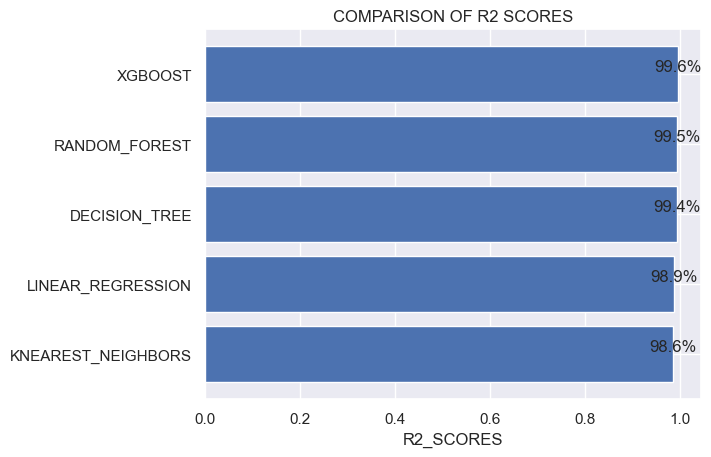

In [80]:
#Plotscores for comaprison analysis
plt.figure(figsize=(4,6))
fig,ax = plt.subplots()
bars = ax.barh(final_df.iloc[0].sort_values(ascending=True).index,final_df.iloc[0].sort_values(ascending=True).values)
for bar in bars:
    width = bar.get_width()
    ax.text(width,
            bar.get_y()+bar.get_height()/2,
           f'{width * 100:.1f}%',
           ha='center',
           va='bottom')
ax.set_title('COMPARISON OF R2 SCORES')
ax.set_xlabel('R2_SCORES')

R2_score represents the goodness of fit of a model. A score of 1 means the model fits perfectly and there is no difference between the predictions and actual values hence a model with a higher r2 score is preferred. 

For this case the XGBoost model had the highest score

Text(0.5, 0, 'MSE_SCORES')

<Figure size 400x600 with 0 Axes>

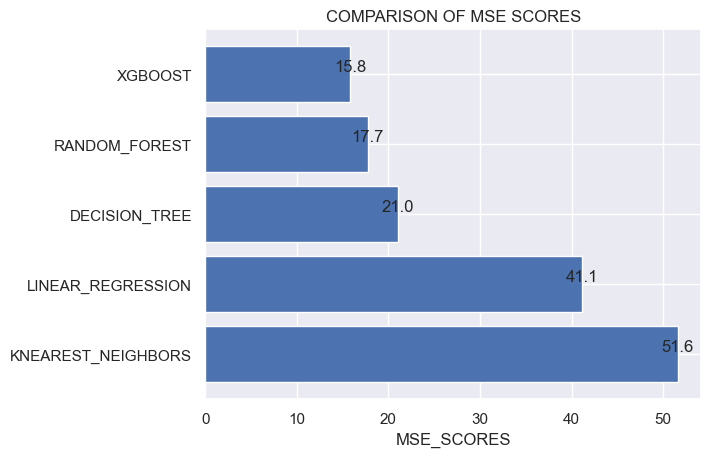

In [81]:
#Plotscores--MSE
plt.figure(figsize=(4,6))
fig,ax = plt.subplots()
bars =  ax.barh(final_df.iloc[1].sort_values(ascending=False).index,final_df.iloc[1].sort_values(ascending=False).values)
for bar in bars:
    width = bar.get_width()
    ax.text(width,
            bar.get_y()+bar.get_height()/2,
           f'{width:.1f}',
           ha='center',
           va='bottom')
ax.set_title('COMPARISON OF MSE SCORES')
ax.set_xlabel('MSE_SCORES')

The mean squared error provides a quantitative measure of the accuracy of a model. A lower MSE indicates better accuracy as the predicted values are closer to the actual values.

Fot this study, the XGBoost model has the lowest MSE

Text(0.5, 0, 'MAPE_SCORES')

<Figure size 400x600 with 0 Axes>

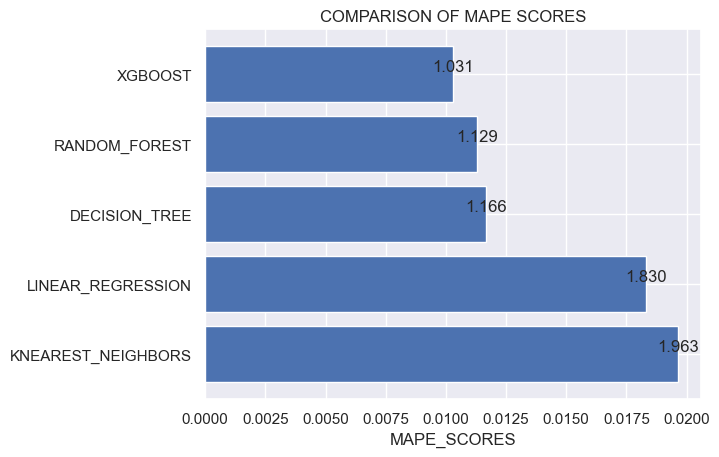

In [82]:
#Plotscores--MSE
plt.figure(figsize=(4,6))
fig,ax = plt.subplots()
bars =  ax.barh(final_df.iloc[3].sort_values(ascending=False).index,final_df.iloc[3].sort_values(ascending=False).values)
for bar in bars:
    width = bar.get_width()
    ax.text(width,
            bar.get_y()+bar.get_height()/2,
           f'{width*100:.3f}',
           ha='center',
           va='bottom')
ax.set_title('COMPARISON OF MAPE SCORES')
ax.set_xlabel('MAPE_SCORES')

Mean Absolute percentage error defines the error of a given model. The lower the MAPE value, the better the model is at predicting the values.

For this case XGBOOST had the lowest MAPE score